In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
            roc_auc_score, confusion_matrix, classification_report, roc_curve
)


In [ ]:
file_path = '/content/drive/MyDrive/Machinelearning/breast-cancer.csv'
df = pd.read_csv(file_path)

In [ ]:
target_col = 'diagnosis'

In [ ]:
X = df.drop(columns=[target_col])
y = df[target_col].astype(str).str.strip().str.lower()
le = LabelEncoder()
y = le.fit_transform(y)
X = X.select_dtypes(include=[np.number])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_estimators = 100
learning_rate = 0.1
max_depth = 1

In [ ]:
y_pred_train = np.full(y_train.shape, np.mean(y_train))

In [ ]:
for i in range(n_estimators):
        # Compute residuals (negative gradient)
        residuals = y_train - y_pred_train
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        tree.fit(X_train, residuals)
        update = learning_rate * tree.predict(X_train)
        y_pred_train += update
        if (i + 1) % 10 == 0 or i == 0:
          loss = np.mean((y_train - y_pred_train) ** 2)
          print(f"Iteration {i+1}/{n_estimators}, Training MSE: {loss:.4f}")

Iteration 1/100, Training MSE: 0.2016
Iteration 10/100, Training MSE: 0.0736
Iteration 20/100, Training MSE: 0.0453
Iteration 30/100, Training MSE: 0.0381
Iteration 40/100, Training MSE: 0.0344
Iteration 50/100, Training MSE: 0.0321
Iteration 60/100, Training MSE: 0.0304
Iteration 70/100, Training MSE: 0.0291
Iteration 80/100, Training MSE: 0.0280
Iteration 90/100, Training MSE: 0.0272
Iteration 100/100, Training MSE: 0.0264


In [ ]:
y_pred_test = np.full(y_test.shape, np.mean(y_train))
for i in range(n_estimators):
    residuals = y_train - y_pred_train  # reuse fitted trees logic
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree.fit(X_train, residuals)
    y_pred_test += learning_rate * tree.predict(X_test)

In [ ]:
y_pred_binary = (y_pred_test >= 0.5).astype(int)

In [ ]:
print("\n=== Model Evaluation ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_binary):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_binary, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_binary, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_binary, zero_division=0):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_binary):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, zero_division=0))


=== Model Evaluation ===
Accuracy:  0.6257
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000
ROC AUC:   0.5000

Confusion Matrix:
[[107   0]
 [ 64   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171



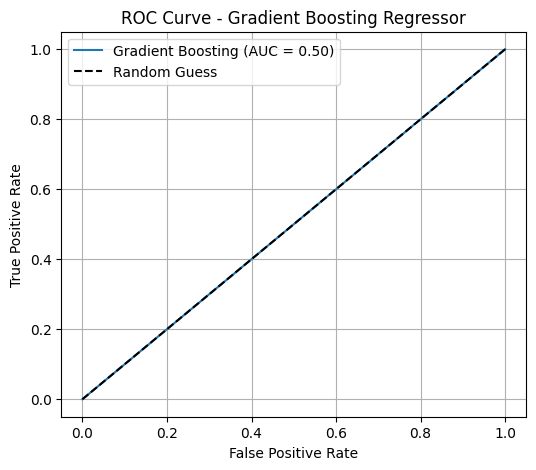

In [ ]:
y_prob = y_pred_test
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Regressor")
plt.legend()
plt.grid(True)
plt.show()